In [55]:
import os
import langdetect

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Get the path to the folder containing the Excel files
excel_folder_path = "../raw/Qatar_Embassies_in_World_Cup_Countries"

# Create a list of all the Excel files in the folder
excel_files = []
for file in os.listdir(excel_folder_path):
    if file.endswith(".xlsx"):
        excel_files.append(file)

In [57]:

# Create a dictionary to store the results
results = {}
all_qatar_embassies_df = pd.DataFrame()

# Loop over all of the Excel files
for excel_file in excel_files:
    # Read the Excel file into a Pandas DataFrame
    df = pd.read_excel(excel_folder_path + "/" + excel_file)

    # Get the total number of tweets
    total_tweets = df.shape[0]

    # Get the total number of original tweets
    # If RTed column is empty then it is an original tweet
    original_tweets = df[df["RTed"].isna()].shape[0]

    # Get the total number of retweets
    retweets = total_tweets - original_tweets

    # Get unique date (not time) values from the created_at column
    # Convert the created_at column to datetime format
    df["created_at"] = pd.to_datetime(df["created_at"])
    # Get the unique date values
    unique_dates = df["created_at"].dt.date.unique()
    # Convert the unique_dates to strings
    unique_dates = unique_dates.astype(str)

    
    languages = []
    hashtags = []
    # Loop over all of the tweets 
    for i  in range(len(df)):
        # Get the text of the tweet
        tweet = df["text"][i]
        # Detect the language of the text
        try:
            language = langdetect.detect(tweet)
        except:
            language = "undetected"
        # Add the language to the list
        languages.append(language)

        # Detect the hashtags in the text
        if "#" in tweet:
            # Split the tweet into words
            words = tweet.split()
            # Loop over all of the words
            for word in words:
                # If the word starts with a hashtag
                if word.startswith("#"):
                    # Add the hashtag to the list
                    hashtags.append(word)    
    
    languages = list(set(languages))  
    hashtags = list(set(hashtags))       

   
    # Get country from excel_file name
    start = excel_file.find(' in ') + 4
    end = excel_file.find('-', start)
    country = excel_file[start:end]
    
    # Add the results to the dictionary
    results[country] = {
        "total_tweets": total_tweets,
        "original_tweets": original_tweets,
        "retweets": retweets,
        "unique_dates": unique_dates,
        "languages": languages, 
        "hashtags": hashtags
    }

    # Concatenate the DataFrame to the all_data DataFrame
    all_qatar_embassies_df = pd.concat([all_qatar_embassies_df, df], ignore_index=True)

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

In [58]:
# Set id column as index 
all_qatar_embassies_df.set_index('id', inplace=True)

In [59]:
# Export df_results as an excel file 
df_results.to_excel('../interim/qatar_embassies_stats.xlsx')
all_qatar_embassies_df.to_excel('../interim/all_qatar_embassies_df.xlsx')

In [60]:
print(f"Total tweets: {all_qatar_embassies_df.shape[0]}")
print(f"Total retweets: {all_qatar_embassies_df[all_qatar_embassies_df['rt'] > 0].shape[0]}")
print(f"Total number of tweets liked at least once: {all_qatar_embassies_df[all_qatar_embassies_df['fav'] > 0].shape[0]}")

Total tweets: 4238
Total retweets: 3846
Total number of tweets liked at least once: 543


In [61]:
# Convert created_at column to datetime
all_qatar_embassies_df['created_at'] = pd.to_datetime(all_qatar_embassies_df['created_at'])
# Get the date value only from created_at column
all_qatar_embassies_df['created_at_date'] = all_qatar_embassies_df['created_at'].dt.date

all_qatar_embassies_df = all_qatar_embassies_df.sort_values(by='created_at_date') # Sort by created_at_date 

Text(0, 0.5, 'Count')

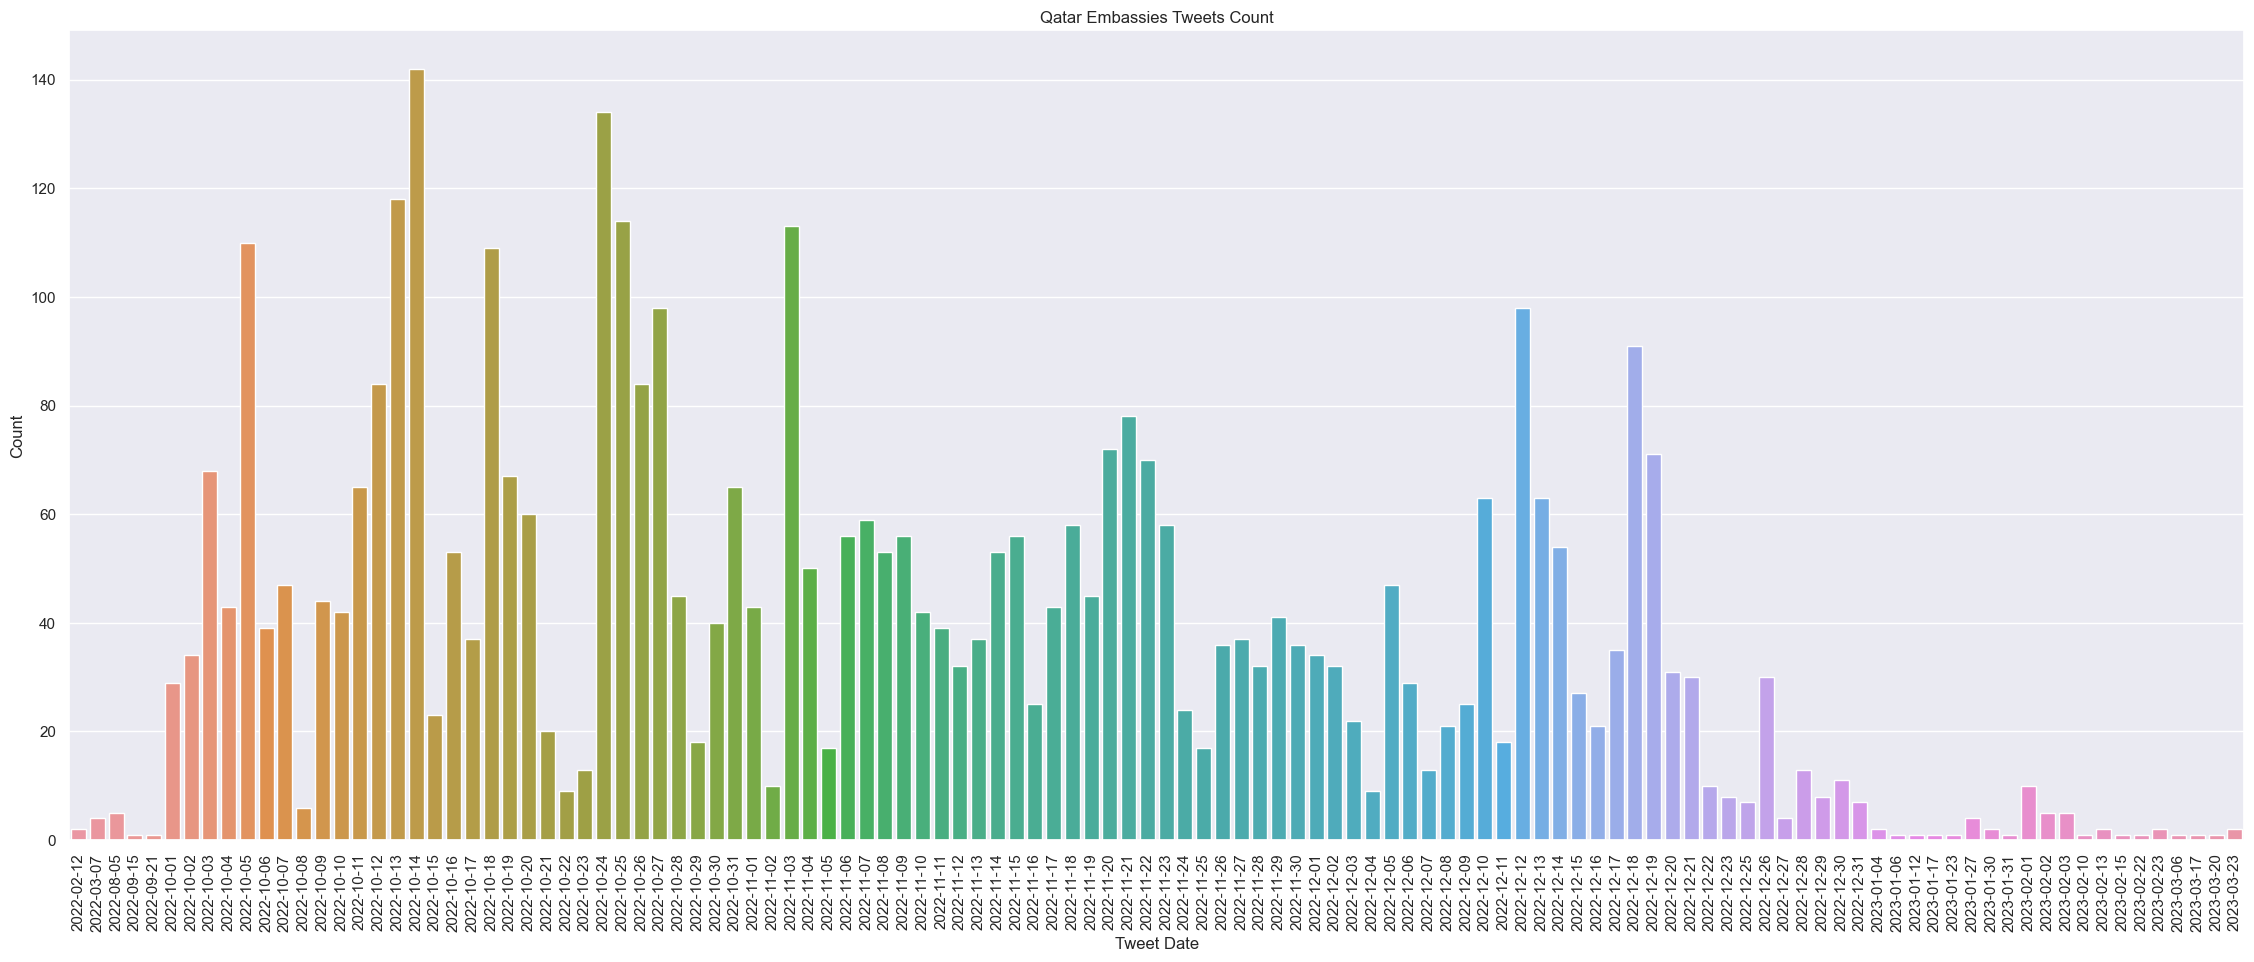

In [62]:

sns.set_style("dark") # Setting style for seaborn plot
sns.set(rc={'figure.figsize':(25,10)}) # Setting size of plot

sns.countplot(data=all_qatar_embassies_df, x="created_at_date") # Prepare a countplot 

plt.title("Qatar Embassies Tweets Count") # Set title for plot
plt.xticks(rotation=90) # rotate the x axis labels
plt.xlabel("Tweet Date") # set x-axis label
plt.ylabel("Count") # set y-axis label